In [1]:
# 导入相关python库
import os
import numpy as np
import pandas as pd

In [2]:
#设定随机数种子
np.random.seed(36)

In [3]:
#使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets

In [20]:

# 从 kc_train.csv 中读取数据
data = pd.read_csv('kc_train.csv', header=None)

# 提取第二列数据
data2 = pd.DataFrame(data.iloc[:, 1])

# 将第一行和第二列数据保存到 kc_train2.csv 中
data.to_csv('kc_train2.csv', index=False, header=False)


In [21]:
#读取数据
housing = pd.read_csv('kc_train.csv')
target=pd.read_csv('kc_train2.csv')  #销售价格
t=pd.read_csv('kc_test.csv')         #测试数据

In [22]:
#数据预处理
housing.info()    #查看是否有缺失值
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   545000    9999 non-null   int64  
 2   3         9999 non-null   int64  
 3   2.25      9999 non-null   float64
 4   1670      9999 non-null   int64  
 5   6240      9999 non-null   int64  
 6   1         9999 non-null   float64
 7   8         9999 non-null   int64  
 8   1240      9999 non-null   int64  
 9   430       9999 non-null   int64  
 10  1974      9999 non-null   int64  
 11  0         9999 non-null   int64  
 12  47.6413   9999 non-null   float64
 13  -122.113  9999 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 1.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20140502  2999 non-null   in

In [23]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   545000    9999 non-null   int64  
 2   3         9999 non-null   int64  
 3   2.25      9999 non-null   float64
 4   1670      9999 non-null   int64  
 5   6240      9999 non-null   int64  
 6   1.0       9999 non-null   float64
 7   8         9999 non-null   int64  
 8   1240      9999 non-null   int64  
 9   430       9999 non-null   int64  
 10  1974      9999 non-null   int64  
 11  0         9999 non-null   int64  
 12  47.6413   9999 non-null   float64
 13  -122.113  9999 non-null   float64
dtypes: float64(4), int64(10)
memory usage: 1.1 MB


In [24]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(housing)   #进行内部拟合，内部参数会发生变化
scaler_housing=minmax_scaler.transform(housing)
scaler_housing=pd.DataFrame(scaler_housing,columns=housing.columns)

In [25]:
mm=MinMaxScaler()
mm.fit(t)
scaler_t=mm.transform(t)
scaler_t=pd.DataFrame(scaler_t,columns=t.columns)

In [26]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()

In [27]:
#进行拟合
LR_reg.fit(scaler_housing,target)

LinearRegression()

In [28]:
#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(scaler_housing)   #输入数据进行预测得到结果
mse=mean_squared_error(preds,target)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值

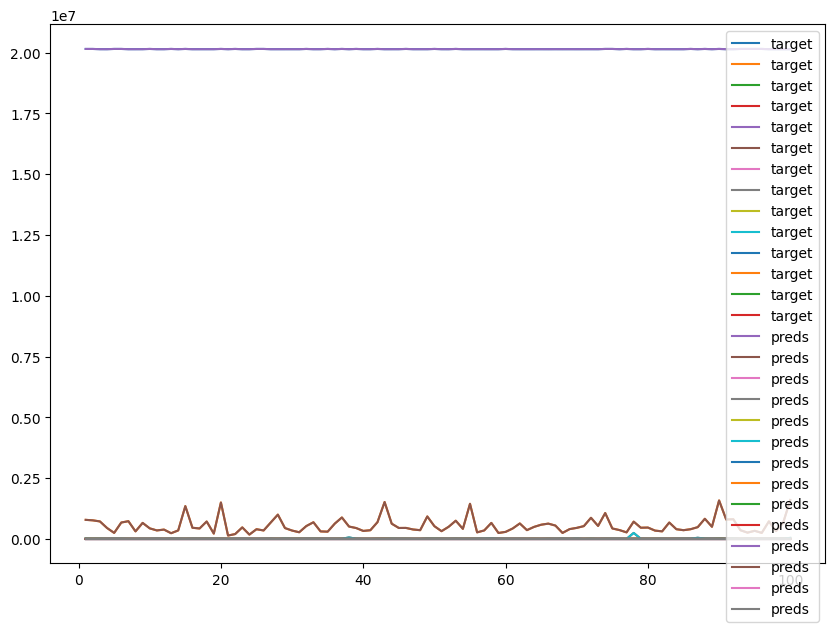

In [32]:
#绘图进行比较
plot.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,target[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()

In [35]:
print(scaler_housing)

      20150302    545000    3      2.25      1670      6240    1    8  \
0     0.968479  0.104258  0.4  0.322581  0.306316  0.006023  0.4  0.7   
1     0.958105  0.101322  0.3  0.419355  0.294737  0.002854  0.4  0.6   
2     0.059950  0.094714  0.5  0.322581  0.264211  0.005423  0.4  0.6   
3     0.010075  0.054993  0.5  0.354839  0.173684  0.004190  0.0  0.4   
4     0.997905  0.025477  0.2  0.129032  0.041053  0.005750  0.0  0.4   
...        ...       ...  ...       ...       ...       ...  ...  ...   
9994  0.061746  0.033407  0.4  0.322581  0.168421  0.002992  0.4  0.5   
9995  0.050274  0.035977  0.4  0.322581  0.201053  0.001971  0.4  0.4   
9996  0.051072  0.150514  0.4  0.451613  0.438947  0.024875  0.4  0.6   
9997  0.011771  0.155653  0.6  0.548387  0.685263  0.147896  0.4  0.6   
9998  0.968379  0.039337  0.2  0.129032  0.042105  0.002773  0.0  0.3   

          1240       430      1974    0   47.6413  -122.113  
0     0.343566  0.000000  0.730435  0.0  0.765001  0.401163  

In [36]:
print(scaler_t)

      20140502    2         1       880      6380  1.1         7     880.1  \
0     0.969936  0.4  0.333333  0.328084  0.012776  0.4  0.333333  0.334672   
1     0.071215  0.4  0.333333  0.209974  0.006824  0.4  0.333333  0.214190   
2     0.011486  0.3  0.333333  0.321522  0.009190  0.4  0.555556  0.327979   
3     0.989612  0.3  0.233333  0.199475  0.020218  0.0  0.444444  0.203481   
4     0.960947  0.3  0.133333  0.131234  0.015964  0.0  0.333333  0.133869   
...        ...  ...       ...       ...       ...  ...       ...       ...   
2994  0.969537  0.3  0.133333  0.107612  0.015847  0.0  0.333333  0.109772   
2995  0.041350  0.4  0.233333  0.228346  0.005231  0.2  0.444444  0.206158   
2996  0.010687  0.3  0.233333  0.112861  0.011554  0.0  0.333333  0.115127   
2997  0.052737  0.3  0.333333  0.342520  0.015708  0.0  0.555556  0.157965   
2998  0.030863  0.4  0.300000  0.503937  0.036745  0.0  0.444444  0.297189   

             0      1938     1994   47.6924  -122.322  
0     0

In [33]:
#输出测试数据
result=LR_reg.predict(scaler_t)
df_result=pd.DataFrame(result)
df_result.to_csv("result.csv")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- -122.322
- 1.1
- 1938
- 1994
- 2
- ...
Feature names seen at fit time, yet now missing:
- -122.113
- 1240
- 1670
- 1974
- 2.25
- ...
